Nama : Ardiansyah

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-07-30 00:57:48--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 172.64.145.29, 104.18.42.227, 2606:4700:4400::6812:2ae3, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|172.64.145.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  55.4MB/s    in 1.2s    

2024-07-30 00:57:50 (55.4 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [5]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20, #
      validation_data=validation_generator,
      validation_steps=5,  #
      verbose=2)

Epoch 1/20
25/25 - 64s - loss: 1.1504 - accuracy: 0.4900 - val_loss: 0.6880 - val_accuracy: 0.5000 - 64s/epoch - 3s/step
Epoch 2/20
25/25 - 62s - loss: 0.7207 - accuracy: 0.5200 - val_loss: 0.6983 - val_accuracy: 0.5000 - 62s/epoch - 2s/step
Epoch 3/20
25/25 - 63s - loss: 0.6994 - accuracy: 0.4900 - val_loss: 0.6866 - val_accuracy: 0.8000 - 63s/epoch - 3s/step
Epoch 4/20
25/25 - 60s - loss: 0.6872 - accuracy: 0.5300 - val_loss: 0.6110 - val_accuracy: 0.7000 - 60s/epoch - 2s/step
Epoch 5/20
25/25 - 61s - loss: 0.7052 - accuracy: 0.6300 - val_loss: 0.6144 - val_accuracy: 0.5000 - 61s/epoch - 2s/step
Epoch 6/20
25/25 - 64s - loss: 0.6819 - accuracy: 0.4700 - val_loss: 0.6822 - val_accuracy: 0.5500 - 64s/epoch - 3s/step
Epoch 7/20
25/25 - 61s - loss: 0.6605 - accuracy: 0.6100 - val_loss: 0.4668 - val_accuracy: 0.8000 - 61s/epoch - 2s/step
Epoch 8/20
25/25 - 60s - loss: 0.6165 - accuracy: 0.6900 - val_loss: 1.0600 - val_accuracy: 0.5500 - 60s/epoch - 2s/step
Epoch 9/20
25/25 - 62s - loss: 0

Saving 5 (1).png to 5 (1).png
1/1 [==============================] - 0s 485ms/step
5 (1).png
messy


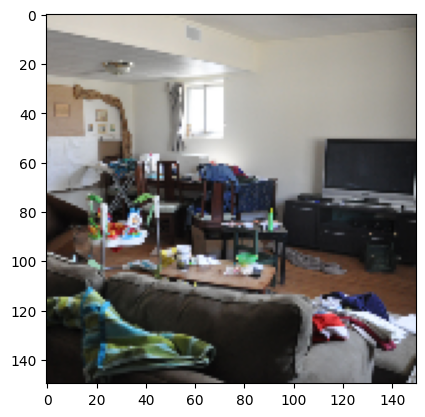

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')